## FRAUD DETECTION LEVERAGING MACHINE LEARNING ALGORITHMS :

In [1]:
## IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [3]:
## GETTING THE DATA

In [4]:
df = pd.read_csv("Fraud.csv")
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
## EDA ON THE DATA

In [6]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
df.shape

(6362620, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.drop(['step', 'isFlaggedFraud', 'nameDest', 'nameOrig'], axis=1, inplace=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [14]:
## getting insights from the raw data

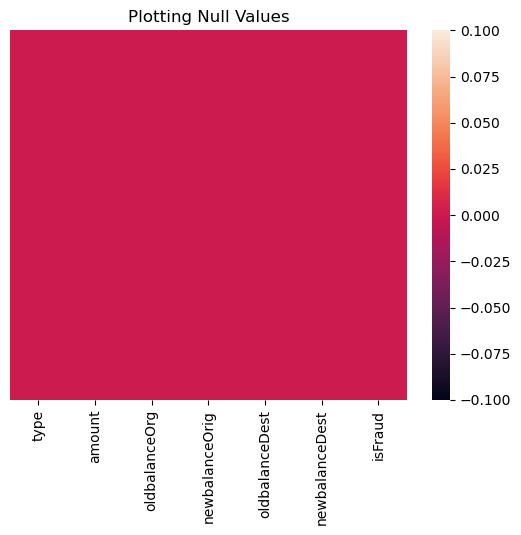

In [15]:

sns.heatmap(df.isnull(), yticklabels=False)
plt.title('Plotting Null Values')
plt.show()

In [16]:
## though there is no null values but we will use imputation technique to fill those values.

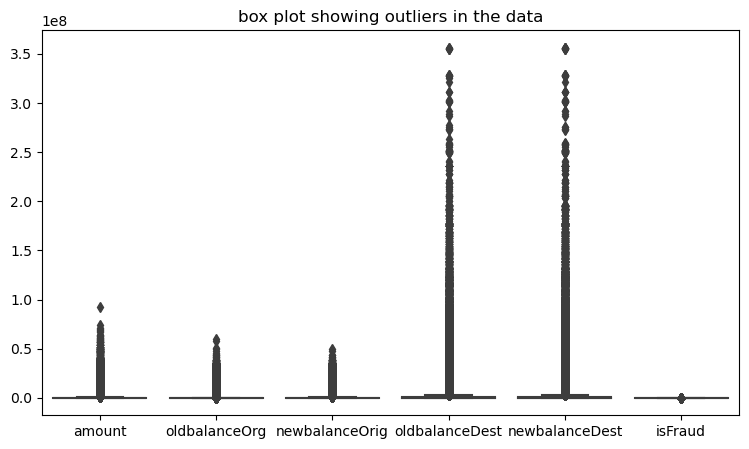

In [17]:
plt.figure(figsize=(9,5))
sns.boxplot(df)
plt.title('box plot showing outliers in the data')
plt.show()

In [18]:
## as we can see that there are actually many outliers so we need to remove this during pour preprocessing methods.

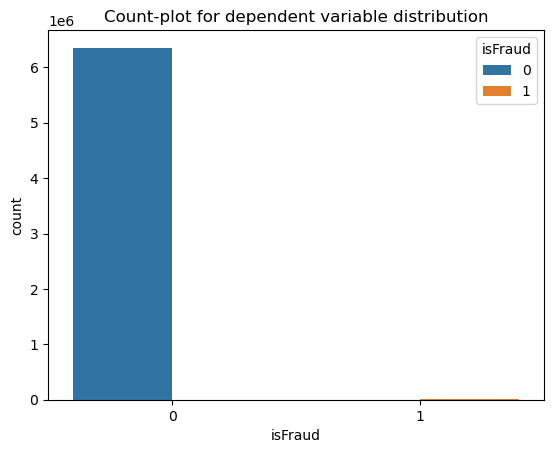

In [19]:
sns.countplot(data = df, x ='isFraud', hue='isFraud')
plt.title('Count-plot for dependent variable distribution')
plt.show()

In [20]:
## maximum cases there were no frauds in the data.

In [21]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [22]:
df['type'].nunique()

5

In [23]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


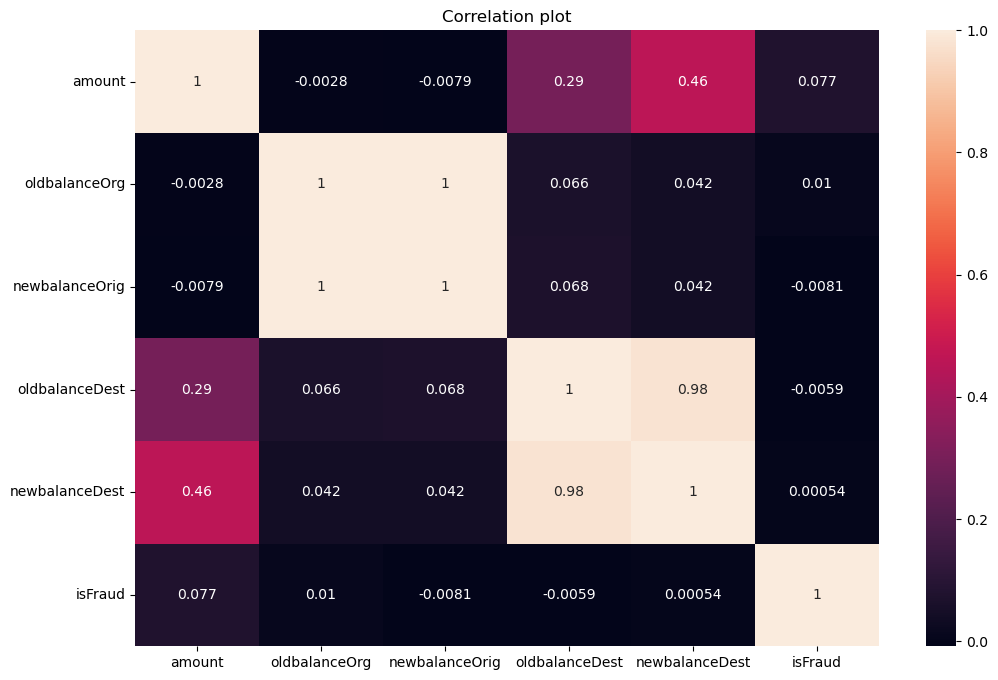

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation plot')
plt.show()

In [25]:
## amount is having positive correlation with new balance destination and old balance destination where as the old
## balance destination and new balance originator is negatively correlated with the dependent variable isFraud.

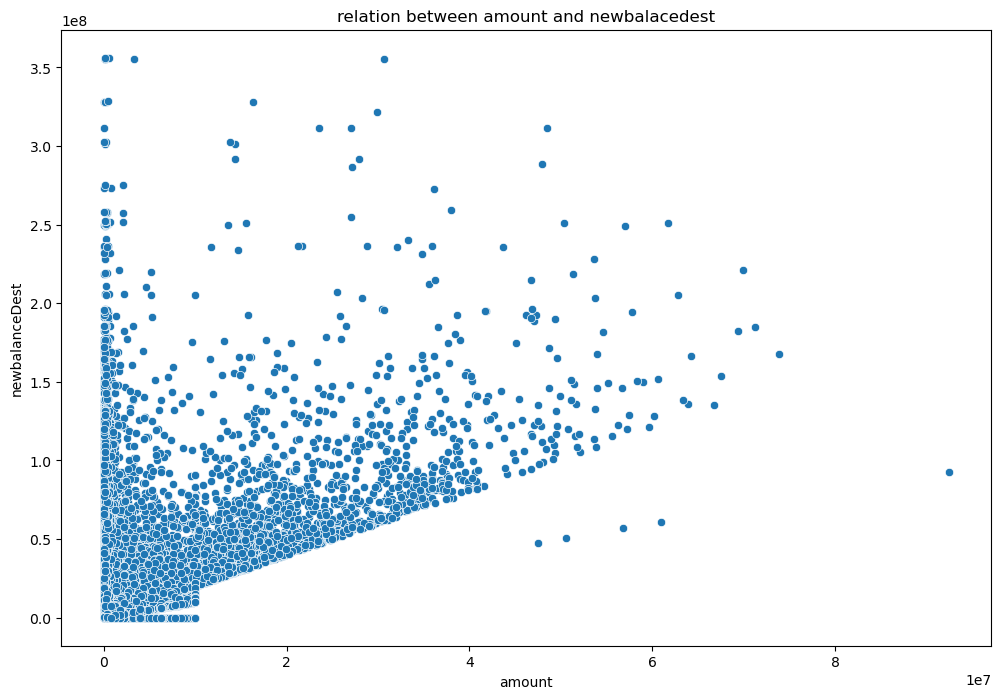

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='amount', y='newbalanceDest')
plt.title('relation between amount and newbalacedest')
plt.show()

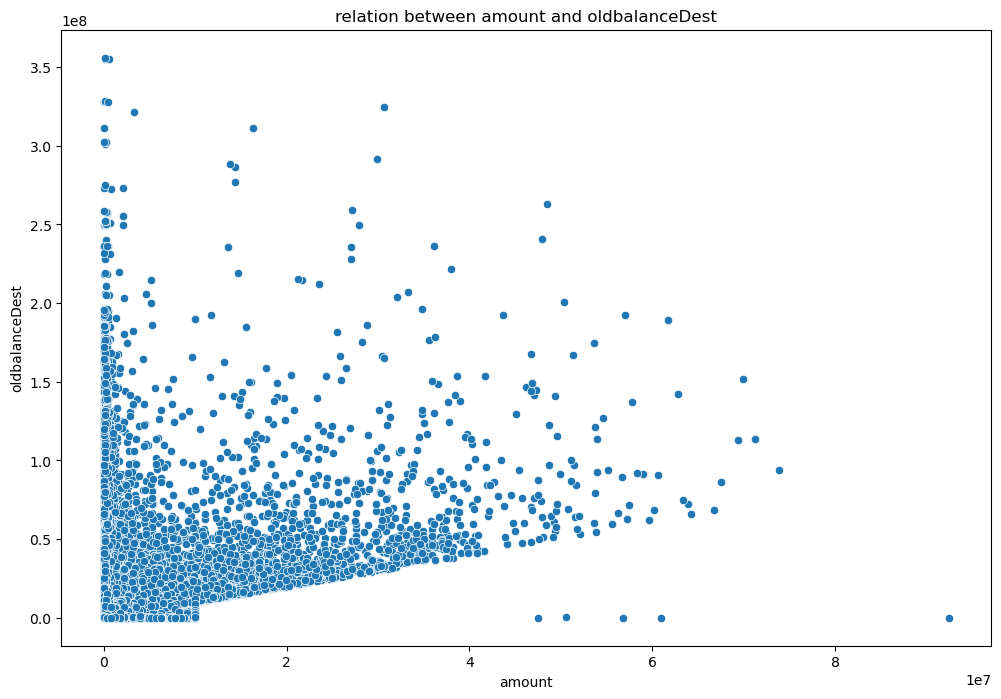

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= df, x='amount', y='oldbalanceDest')
plt.title('relation between amount and oldbalanceDest')
plt.show()

In [28]:
## both teh plots above showing positive correlation between 2 independent variables.

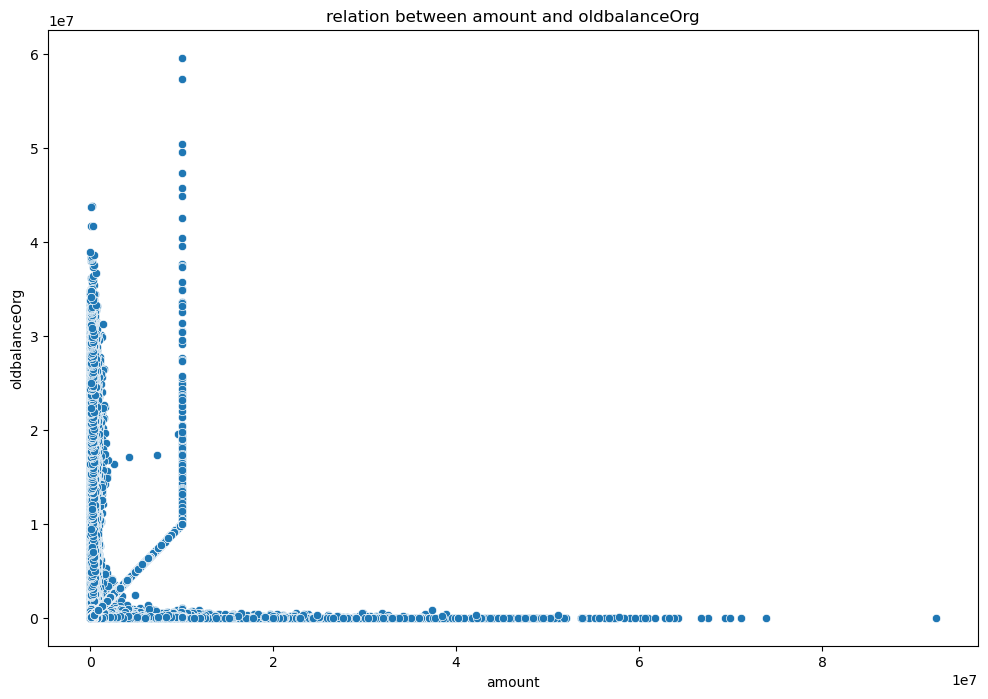

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='amount', y='oldbalanceOrg')
plt.title('relation between amount and oldbalanceOrg')
plt.show()

In [30]:
## the above plot shows no correlation at all between the 2 independent variables.

In [31]:
## DATA CLEANING

In [32]:
## BALANCING BOTH THE CLASSES AS THERE IS A HUGE MISCLASSIFICATION PROBLEM

In [33]:
fraud_cases = df[df['isFraud']==1]
non_fraud_cases = df[df['isFraud'] == 0]


In [34]:
## undersampling the majority class that is the non-fraud cases

non_fraud_downsampled = resample(non_fraud_cases, replace=False, n_samples=len(fraud_cases), random_state=42)


In [35]:
## Creating a balanced dataframe or a new data concatinating both the above dataframes of 2 classes

balanced_data = pd.concat([fraud_cases, non_fraud_downsampled])
balanced_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
251,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
252,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
680,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4779354,CASH_OUT,265820.49,0.00,0.00,899770.81,1165591.30,0
1913121,CASH_IN,186719.44,159.00,186878.44,0.00,0.00,0
1989584,CASH_OUT,136972.48,0.00,0.00,1140442.13,1277414.61,0
3085033,PAYMENT,9935.66,286287.65,276351.98,0.00,0.00,0


In [36]:
balanced_data.shape

(16426, 7)

In [37]:
## REPLACING THE MISSING VALUES WITH THE MEAN AND MEDIAN IMPUTAION TECHNIQUES

In [38]:
balanced_data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000
mean,8.248655e+05,1.242838e+06,5.257872e+05,8.311948e+05,1.260807e+06,0.500000
std,1.862573e+06,3.252860e+06,2.505016e+06,3.484266e+06,3.864760e+06,0.500015
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.815791e+04,1.035827e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.752676e+05,1.212709e+05,0.000000e+00,0.000000e+00,1.297782e+05,0.500000
75%,5.404362e+05,7.979333e+05,0.000000e+00,5.283537e+05,1.091986e+06,1.000000
max,3.147911e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [39]:
balanced_data['oldbalanceOrg'] = balanced_data['oldbalanceOrg'].replace(0.0, balanced_data['oldbalanceOrg'].median())

balanced_data['newbalanceOrig'] = balanced_data['newbalanceOrig'].replace(0.0, balanced_data['newbalanceOrig'].mean())

balanced_data['oldbalanceDest'] = balanced_data['oldbalanceDest'].replace(0.0, balanced_data['oldbalanceDest'].mean())

balanced_data['newbalanceDest'] = balanced_data['newbalanceDest'].replace(0.0, balanced_data['oldbalanceDest'].mean())


balanced_data


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.000,525787.155791,8.311948e+05,1.276496e+06,1
3,CASH_OUT,181.00,181.000,525787.155791,2.118200e+04,1.276496e+06,1
251,TRANSFER,2806.00,2806.000,525787.155791,8.311948e+05,1.276496e+06,1
252,CASH_OUT,2806.00,2806.000,525787.155791,2.620200e+04,1.276496e+06,1
680,TRANSFER,20128.00,20128.000,525787.155791,8.311948e+05,1.276496e+06,1
...,...,...,...,...,...,...,...
4779354,CASH_OUT,265820.49,121270.875,525787.155791,8.997708e+05,1.165591e+06,0
1913121,CASH_IN,186719.44,159.000,186878.440000,8.311948e+05,1.276496e+06,0
1989584,CASH_OUT,136972.48,121270.875,525787.155791,1.140442e+06,1.277415e+06,0
3085033,PAYMENT,9935.66,286287.650,276351.980000,8.311948e+05,1.276496e+06,0


In [40]:
balanced_data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000
mean,8.248655e+05,1.263244e+06,9.322751e+05,1.276496e+06,1.820333e+06,0.500000
std,1.862573e+06,3.245371e+06,2.428193e+06,3.401713e+06,3.731831e+06,0.500015
min,0.000000e+00,2.000000e+00,1.870000e+00,3.510000e+00,6.380000e+01,0.000000
25%,3.815791e+04,6.066522e+04,5.257872e+05,7.163911e+05,7.389516e+05,0.000000
50%,1.752676e+05,1.213349e+05,5.257872e+05,8.311948e+05,1.276496e+06,0.500000
75%,5.404362e+05,7.979333e+05,5.257872e+05,8.311948e+05,1.276496e+06,1.000000
max,3.147911e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [41]:
## PREPROCESSING

In [42]:
## OUTLIER REMOVAL


In [43]:
columns_to_check = ['amount', 'oldbalanceDest', 'newbalanceDest']


In [44]:
for col in columns_to_check:
    Q1 = balanced_data[col].quantile(0.25)
    Q3 = balanced_data[col].quantile(0.75)
    IQR = Q3 - Q1

In [45]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
balanced_data = balanced_data[(balanced_data[col] >= lower_bound) & (balanced_data[col] <= upper_bound)]

In [47]:
balanced_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.000,525787.155791,8.311948e+05,1.276496e+06,1
3,CASH_OUT,181.00,181.000,525787.155791,2.118200e+04,1.276496e+06,1
251,TRANSFER,2806.00,2806.000,525787.155791,8.311948e+05,1.276496e+06,1
252,CASH_OUT,2806.00,2806.000,525787.155791,2.620200e+04,1.276496e+06,1
680,TRANSFER,20128.00,20128.000,525787.155791,8.311948e+05,1.276496e+06,1
...,...,...,...,...,...,...,...
4779354,CASH_OUT,265820.49,121270.875,525787.155791,8.997708e+05,1.165591e+06,0
1913121,CASH_IN,186719.44,159.000,186878.440000,8.311948e+05,1.276496e+06,0
1989584,CASH_OUT,136972.48,121270.875,525787.155791,1.140442e+06,1.277415e+06,0
3085033,PAYMENT,9935.66,286287.650,276351.980000,8.311948e+05,1.276496e+06,0


In [48]:
## LABEL ENCODING

In [49]:
encoder = LabelEncoder()

In [50]:
balanced_data['type'] = encoder.fit_transform(balanced_data['type'])

balanced_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,4,181.00,181.000,525787.155791,8.311948e+05,1.276496e+06,1
3,1,181.00,181.000,525787.155791,2.118200e+04,1.276496e+06,1
251,4,2806.00,2806.000,525787.155791,8.311948e+05,1.276496e+06,1
252,1,2806.00,2806.000,525787.155791,2.620200e+04,1.276496e+06,1
680,4,20128.00,20128.000,525787.155791,8.311948e+05,1.276496e+06,1
...,...,...,...,...,...,...,...
4779354,1,265820.49,121270.875,525787.155791,8.997708e+05,1.165591e+06,0
1913121,0,186719.44,159.000,186878.440000,8.311948e+05,1.276496e+06,0
1989584,1,136972.48,121270.875,525787.155791,1.140442e+06,1.277415e+06,0
3085033,3,9935.66,286287.650,276351.980000,8.311948e+05,1.276496e+06,0


In [51]:
## we should not scale the dependent variables so we need to scale only the features but before that we should split 
## the data into x and y

In [52]:
## SPLIT INTO X AND Y

In [53]:
x = balanced_data.drop('isFraud', axis =1)

y = balanced_data['isFraud']

In [54]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,4,181.00,181.000,525787.155791,8.311948e+05,1.276496e+06
3,1,181.00,181.000,525787.155791,2.118200e+04,1.276496e+06
251,4,2806.00,2806.000,525787.155791,8.311948e+05,1.276496e+06
252,1,2806.00,2806.000,525787.155791,2.620200e+04,1.276496e+06
680,4,20128.00,20128.000,525787.155791,8.311948e+05,1.276496e+06
...,...,...,...,...,...,...
4779354,1,265820.49,121270.875,525787.155791,8.997708e+05,1.165591e+06
1913121,0,186719.44,159.000,186878.440000,8.311948e+05,1.276496e+06
1989584,1,136972.48,121270.875,525787.155791,1.140442e+06,1.277415e+06
3085033,3,9935.66,286287.650,276351.980000,8.311948e+05,1.276496e+06


In [55]:
y

2          1
3          1
251        1
252        1
680        1
          ..
4779354    0
1913121    0
1989584    0
3085033    0
4712423    0
Name: isFraud, Length: 13767, dtype: int64

In [56]:
## SCALING THE FEATURES TO BRING THEM ON A LINEAR OR A SAME SCALE (FEATURE ENGINEERING)

In [57]:
scaler = StandardScaler()

In [58]:
x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.16728358, -0.39980997, -0.33273211, -0.16091986,  0.3235418 ,
         0.59859242],
       [-0.84498702, -0.39980997, -0.33273211, -0.16091986, -2.07209868,
         0.59859242],
       [ 1.16728358, -0.39801736, -0.33189524, -0.16091986,  0.3235418 ,
         0.59859242],
       ...,
       [-0.84498702, -0.30639541, -0.29412791, -0.16091986,  1.23815143,
         0.60049269],
       [ 0.49652671, -0.39314854, -0.24151954, -0.26380323,  0.3235418 ,
         0.59859242],
       [ 0.49652671, -0.39946158, -0.29412791, -0.16091986,  0.3235418 ,
         0.59859242]])

In [59]:
## CONTROLLING THE SPLIT RANDOMNESS


In [60]:
np.random.seed(42)

In [61]:
## SPLITTING THE DATA SET INTO TRAIN AND TEST DATA

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=42)

In [63]:
print(x_train.shape, y_train.shape)

(11013, 6) (11013,)


In [64]:
print(x_test.shape, y_test.shape)

(2754, 6) (2754,)


In [65]:
## MULTI-COLINEARITY

In [66]:
## y = bo + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 +b6x6

## y = fraud prediction
## x1 = 'type'
## x2 = 'amount'
## x3 = 'oldbalanceOrg'
## x4 = 'newbalanceOrig'
## x5 = 'oldbalanceDest'
## x6 = 'newbalanceDest'

## b1 =6

In [67]:
vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))


In [68]:
vif

[1.5602254814862517,
 27.00832791323855,
 123.14195715542249,
 75.71121971008193,
 1.584787388697752,
 2.0767580930376197]

In [69]:
pd.DataFrame({'vif':vif}, index = balanced_data.columns[0:6]).T

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
vif,1.560225,27.008328,123.141957,75.71122,1.584787,2.076758


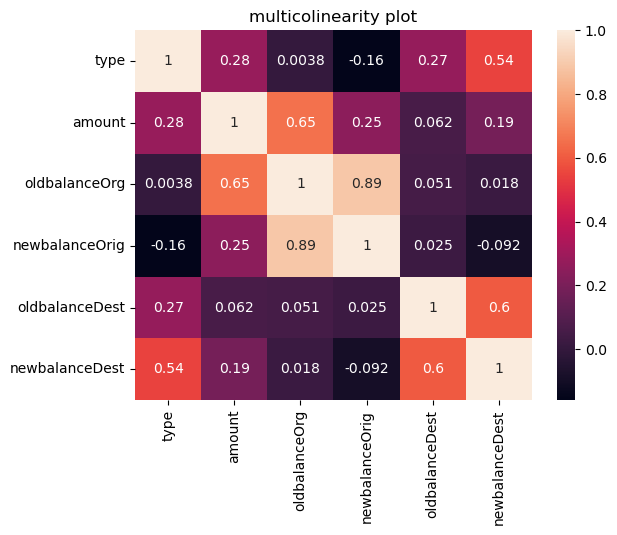

In [70]:
## visualising it 

sns.heatmap(balanced_data.iloc[:,0:6].corr(), annot=True)
plt.title('multicolinearity plot')
plt.show()

In [71]:
## OR 

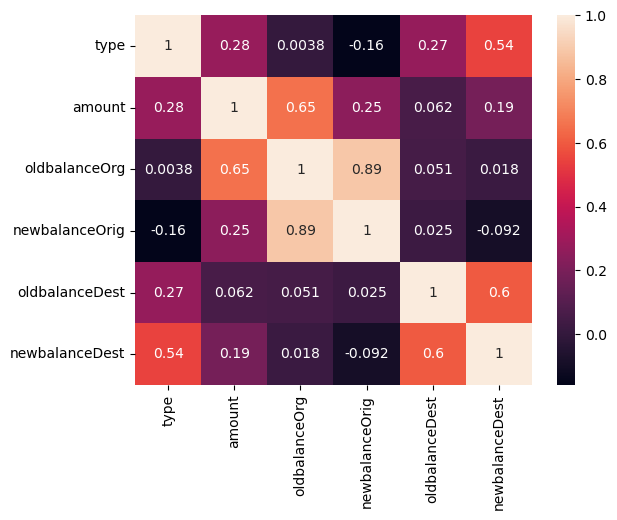

In [72]:
sns.heatmap(balanced_data.drop('isFraud', axis=1).corr(), annot = True)
plt.show()

In [73]:
## as we can notice that transaction type and new balance destination are positively correlated to each other, old balance
## destination and new balance destination are positive correlation to each other and amount and old balance originator 
## are positively correlated to each other.

In [74]:
## MODEL BUILDING

In [75]:
## LOGISTIC REGRESSION 

In [76]:
## CREATING THE MODEL

In [77]:
log_m = LogisticRegression()

In [78]:
## DEFINING THE PARAMETERS


param_grid = {'C' :[0.01, 0.1, 1, 10, 100]}

In [79]:
## GRID SEARCH CV FOR HYPER-PARAMETER TUNNING TO GET THE BEST PREDICTION FROM THE MODEL

In [80]:
grid_log = GridSearchCV(log_m, param_grid, cv = 5)

In [81]:
## TRAINING OR FITTING THE MODEL

In [82]:
grid_log.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [83]:
## FINDING THE BEST PARAMETER AND THE ESTIMATOR

In [84]:
grid_log.best_params_

{'C': 100}

In [85]:
best_log = grid_log.best_estimator_

best_log

LogisticRegression(C=100)

In [86]:
## PREDICTION FROM THE MODEL

In [87]:
grid_log_pred = grid_log.predict(x_test)

In [88]:
## EVALUATING THE MODEL PERFORMANCE

In [89]:
print(confusion_matrix(y_test, grid_log_pred))

[[1210  181]
 [ 318 1045]]


In [90]:
print(classification_report(y_test, grid_log_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1391
           1       0.85      0.77      0.81      1363

    accuracy                           0.82      2754
   macro avg       0.82      0.82      0.82      2754
weighted avg       0.82      0.82      0.82      2754



In [91]:
## RANDOM FOREST

In [92]:
## creating a model 

In [93]:
rd_mo = RandomForestClassifier()

In [94]:
## defining the parameters

In [95]:
param_rand =  {'n_estimators': [50, 100, 200]}

In [96]:
## GRID SEARCH CV FOR HYPERPARANMETER TUNNING

In [97]:
grid_ran = GridSearchCV(rd_mo, param_rand, cv = 5)

In [98]:
## TRAINING THE MODEL

grid_ran.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [99]:
## FINDING THE BEST PARAMETER AND ESTIMATOR

In [100]:
grid_ran.best_params_

{'n_estimators': 200}

In [101]:
best_ran = grid_ran.best_estimator_
best_ran

RandomForestClassifier(n_estimators=200)

In [102]:
## PREDICTIONS FROM THE MODEL

In [103]:
grid_ran_pred = grid_ran.predict(x_test)

grid_ran_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [104]:
## EVALUATING THE MODEL PERFORMANCE

In [105]:
print(classification_report(y_test, grid_ran_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1391
           1       0.98      0.99      0.99      1363

    accuracy                           0.99      2754
   macro avg       0.99      0.99      0.99      2754
weighted avg       0.99      0.99      0.99      2754



In [106]:
print(confusion_matrix(y_test, grid_ran_pred))

[[1367   24]
 [   8 1355]]


In [107]:
## FEATURE IMPORTANCES PLOT 

In [108]:
impor= best_ran.feature_importances_

In [109]:
feat_impor=pd.DataFrame({'Feature':x.columns, 'Importance':impor})

feat_impor

,Feature,Importance
0,type,0.297896
1,amount,0.209687
2,oldbalanceOrg,0.255542
3,newbalanceOrig,0.118169
4,oldbalanceDest,0.041690
5,newbalanceDest,0.077016


In [110]:
feat_impor=feat_impor.sort_values('Importance',ascending=False)

feat_impor

,Feature,Importance
0,type,0.297896
2,oldbalanceOrg,0.255542
1,amount,0.209687
3,newbalanceOrig,0.118169
5,newbalanceDest,0.077016
4,oldbalanceDest,0.041690


In [111]:
## plotting the feature importances

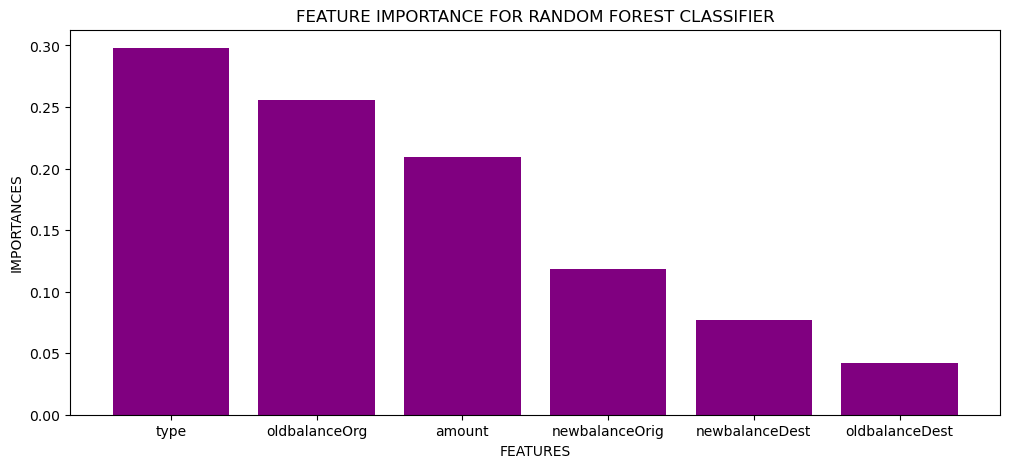

In [112]:
plt.figure(figsize=(12,5))
plt.bar(feat_impor['Feature'],feat_impor['Importance'],color='Purple')
plt.title('FEATURE IMPORTANCE FOR RANDOM FOREST CLASSIFIER')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCES')
plt.show()

In [113]:
## FINAL INTERPRETATION FROM THE DATASET ARE :

## Top 5 features 

## 1. Transaction type
## 2. Old balance Originator
## 3. Transaction amount
## 4. New balance Originator
## 5. New balance Destination

## RANDOM FOREST CLASSIFIER IS THE BEST PERFORMING MODEL WITH RECALL of approximately 0.99, THEREBY THIS MODEL CAN 
## BE LEVERAGED BY THE BUSINESS DOMAIN INORDER TO SOLVE THEIR BUSINESS PROBLEM IN THE MOST EFFECTIVE MANNER.

## As it is a fraud detection case study so we need to focus on the recall, also known as False Negative Rate or Sensitivity, 
## is an important metric in fraud detection because it focuses on minimizing false negatives. In the context of 
## fraud detection, a false negative occurs when a genuine fraudulent transaction is classified as non-fraudulent.
## This can have significant financial and reputational consequences for both the business and its customers.

## By focusing on improving Recall in fraud detection, businesses can significantly reduce the risk of missing 
## genuine fraudulent cases, leading to enhanced financial security, customer satisfaction, and regulatory compliance.
## This approach of ensemble learning contributes to a more robust and effective fraud prevention strategy.


In [114]:
## CONCLUSION : Answers from the dataset

## 1. Data Cleaning: we have handled the missing values by replacing the 0.0 with their mean, median depending on the data 
## distribution.
## we have found the multi collinearity as well along with their visualization using a heat map and we have used technique 
## like IQR to identify and potentially remove outliers in the data.
## 2. Fraud Detection Model: The fraud detection model is based on a supervised learning approach, most likely a 
## binary classification model. Given that fraud detection is a critical task, an ensemble method like Random Forest
## might be chosen for its ability to handle complex relationships and provide robust predictions.
## 3. Variable Selection:The variables for the model are selected based on their relevance and importance in 
## predicting fraud. Features that are likely to have a significant impact on fraud (such as old balance originator, 
## transaction amount, type of transaction processed, etc.) are included. 
## 4. MODEL PERFORMANCE EVALUATION - In summary, recall is considered a key metric in fraud detection because it focuses 
## on minimizing false negatives, which can have significant financial and reputational consequences for both the
## business and its customers. Balancing high recall with acceptable precision ensures a robust fraud detection model.
## 5. Key Predictive Factors for Fraud:
## Key factors predicting fraudulent behavior might include:
##  1. Transaction type
## 2. Old balance Originator
## 3. Transaction amount
## 4. New balance Originator
## 5. New balance Destination
## 6. Interpretation of the key factors - These features collectively provide a snapshot of the financial transaction, 
## including the state of accounts before and after, the amount involved, and the nature of the transaction. Analyzing
## these variables in conjunction with other relevant information can contribute to the detection of potentially 
## fraudulent activity. Keep in mind that these features are typically used in combination with other techniques, 
## such as machine learning algorithms, anomaly detection, and behavioral analysis, to build a comprehensive fraud 
## detection system.
## 7. Prevention Strategies - Provide comprehensive training to employees on best practices for cybersecurity and 
## fraud prevention. Educate them on how to recognize and report suspicious activities.
## Implement advanced fraud detection tools and algorithms, such as machine learning models and anomaly detection 
## systems, to automatically identify and flag potentially fraudulent transactions.
## By implementing these prevention strategies during an infrastructure update, businesses can significantly 
## enhance their ability to detect and prevent fraudulent activities, ultimately safeguarding their operations,
## reputation, and customer trust. These measures work collectively to create a more secure and resilient environment 
## against potential fraud threats.
## 8. Determining the Effectiveness of Prevention Measures:
## Monitoring the rate of detected fraud cases.
## Comparing performance metrics before and after implementing prevention measures.
## Thereby, this hypothetical scenario outlines a comprehensive approach to proactive fraud detection, from data 
## cleaning to prevention strategy assessment. It emphasizes the importance of leveraging both data-driven models 
## and robust infrastructure to mitigate fraud risk.



